In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(palette='Set2')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.exceptions import ConvergenceWarning
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score

from sklearn import datasets
from sklearn.neighbors import KNeighborsClassifier
from sklearn.manifold import TSNE, Isomap, LocallyLinearEmbedding

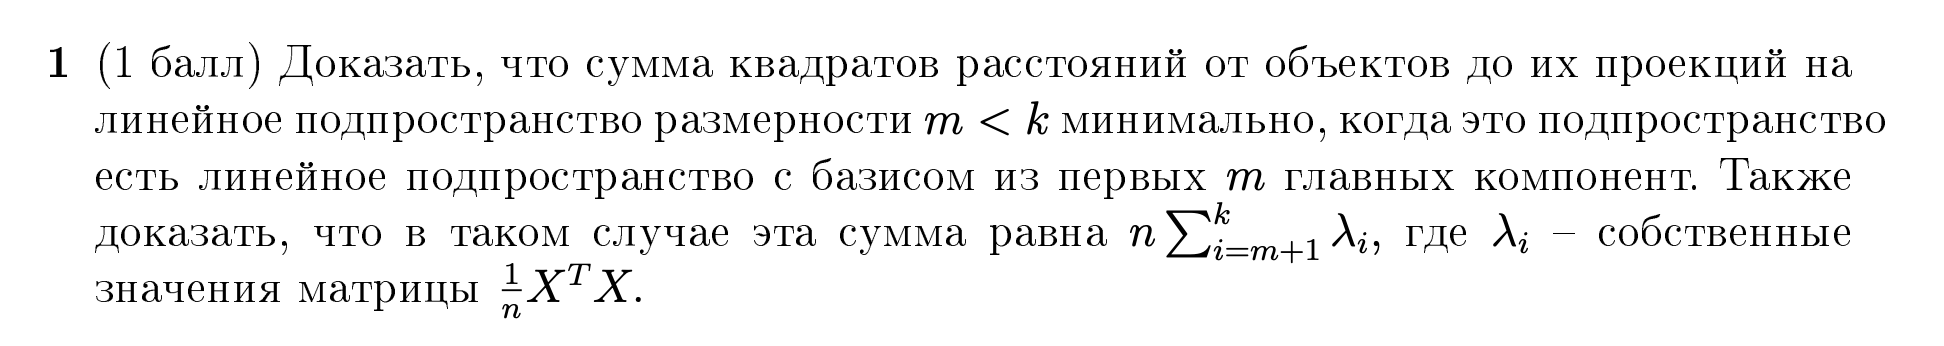

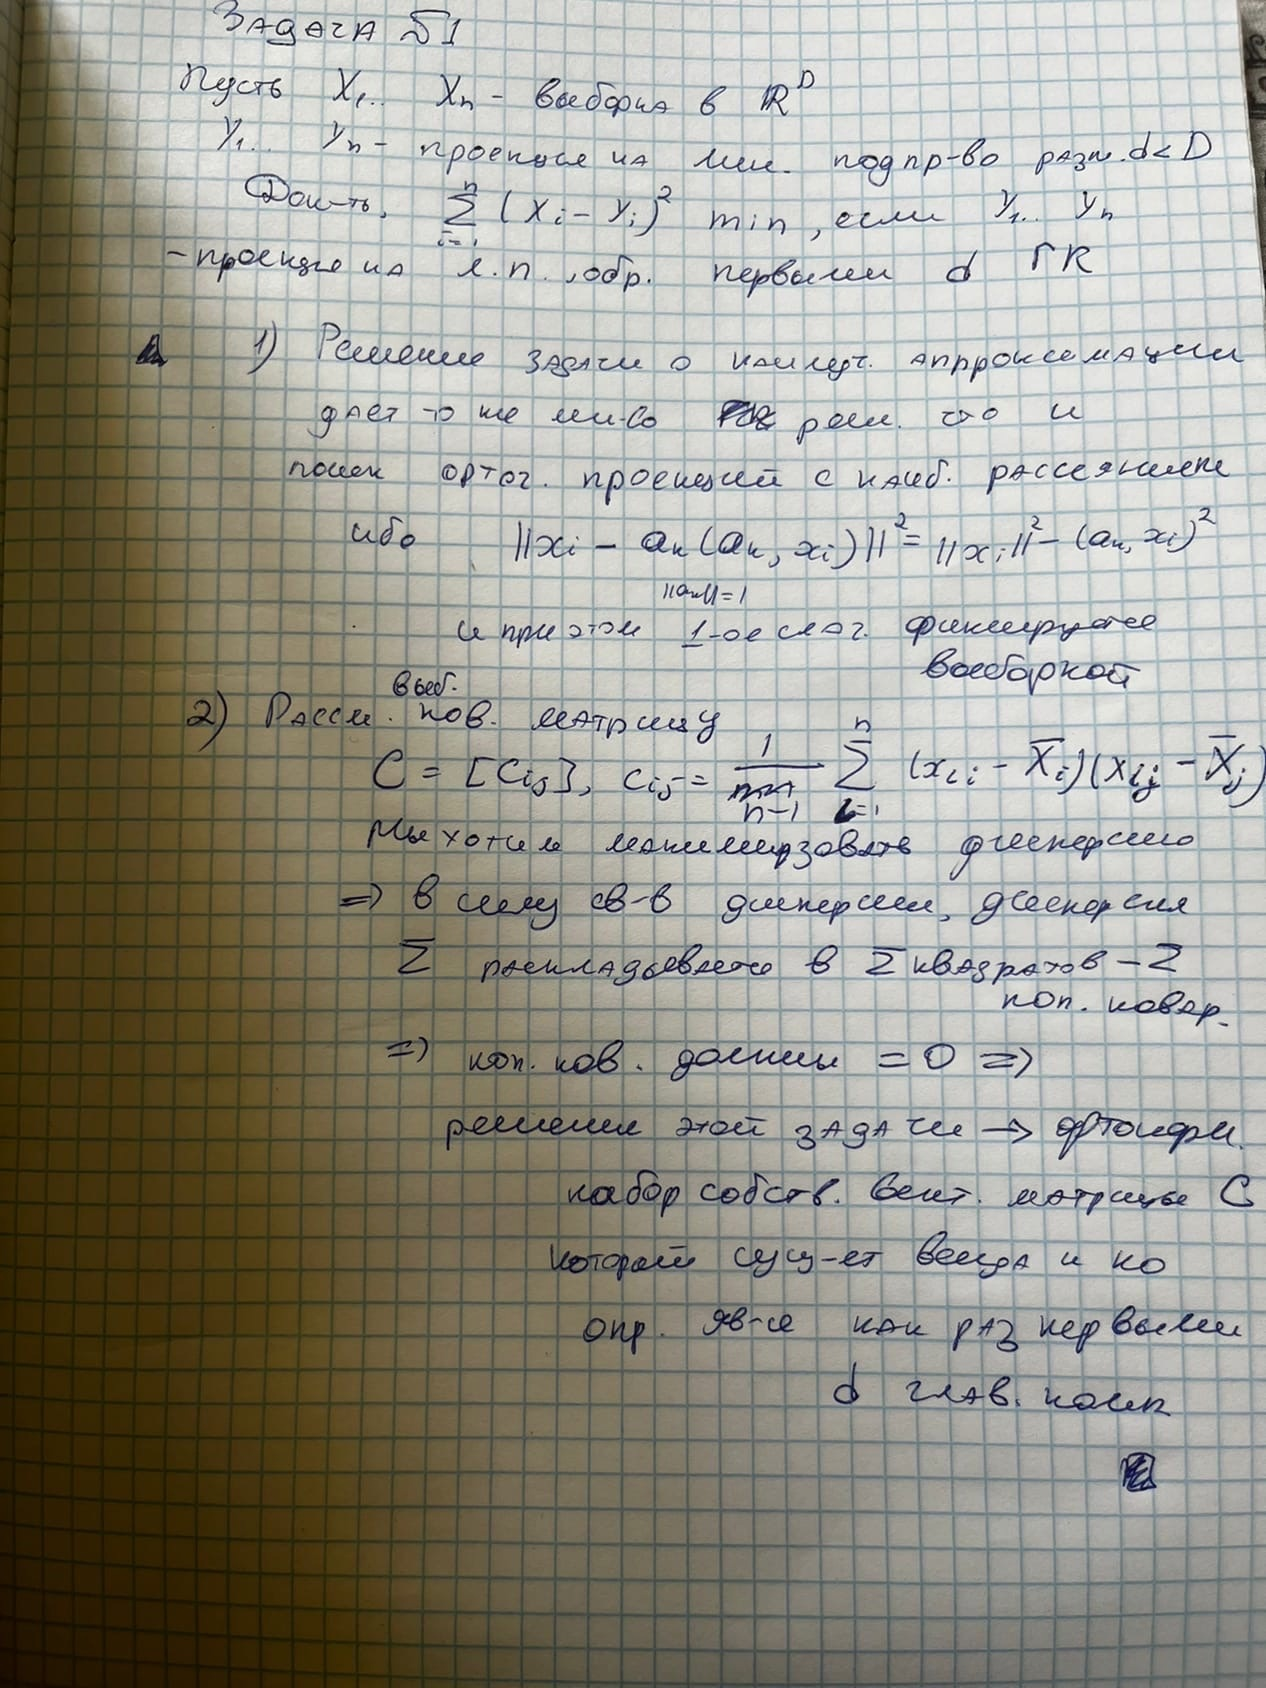

Это был пункт 1, теперь докажем пункт 2 (нет)


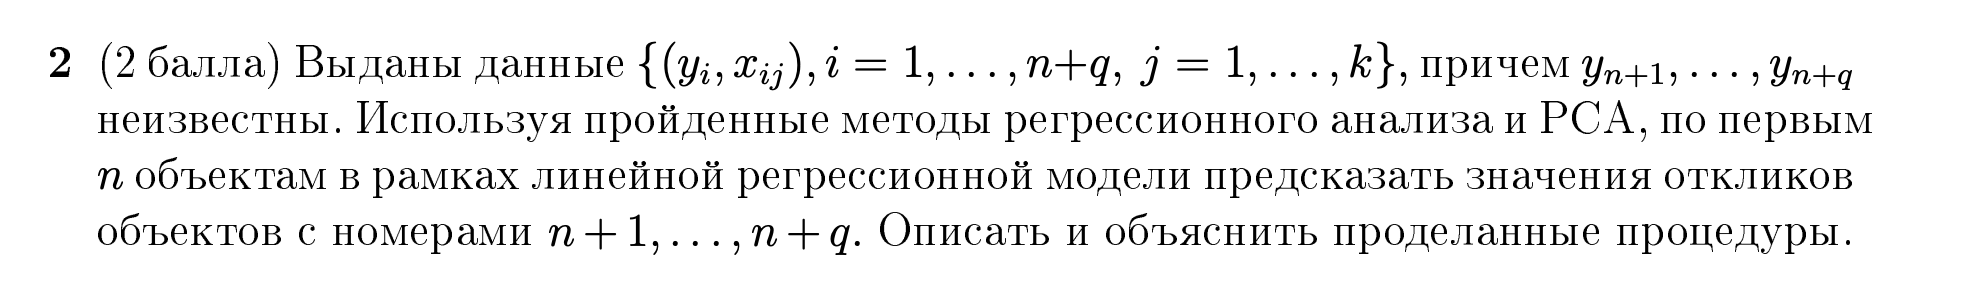

In [2]:
data = pd.read_excel("hw11t2_train.xlsx", skiprows = [0])
data.head(10)

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,...,V-22.4,V-23.4,V-24.4,V-25.4,V-26.4,V-27.4,V-28.4,V-29.4,V-9,V-10
0,81,1,85,1,1,3150.0,920.0,598.5,190,1010.84,...,815.50,1755.00,8002.0,60.74,54.26,2978.26,41407.0,601988.1,2200.0,410.0
1,84,1,89,4,1,7600.0,1140.0,3040.0,400,963.81,...,1316.30,8364.78,8393.0,90.95,89.79,11379.37,44835.0,929027.1,5000.0,1000.0
2,78,1,81,4,1,4800.0,840.0,480.0,100,689.84,...,765.80,1755.00,4930.0,38.70,32.04,1653.06,37933.0,377828.6,1200.0,170.0
3,72,2,73,2,1,685.0,202.0,13.7,20,459.54,...,152.25,1442.31,1456.0,9.73,8.34,686.16,8194.0,122031.7,165.0,30.0
4,87,1,90,2,1,3000.0,800.0,1230.0,410,631.91,...,2244.10,9231.76,9286.0,136.60,140.20,9821.00,48260.0,1734973.5,5500.0,700.0
5,87,1,90,1,1,2500.0,640.0,1050.0,420,647.32,...,2244.10,9231.76,9286.0,136.60,140.20,9821.00,48260.0,1734973.5,5200.0,700.0
6,87,2,90,1,1,1810.0,492.0,1158.4,640,843.98,...,2526.40,9254.28,9306.0,136.56,138.80,9291.00,12393.0,1732937.5,5800.0,900.0
7,88,1,89,3,1,1150.0,380.0,575.0,500,590.68,...,3148.00,9248.40,9380.0,158.63,169.50,10082.00,49572.0,2318397.0,4600.0,600.0
8,76,3,77,4,1,2110.0,540.0,189.9,90,732.14,...,550.40,1755.00,4252.0,30.13,21.54,2134.49,18409.0,402158.1,870.0,110.0
9,80,1,80,4,1,3030.0,930.0,515.1,170,1007.38,...,764.50,1755.00,8420.0,54.62,44.79,2206.19,40234.0,629797.2,1700.0,190.0


In [3]:
data.shape

(372, 109)

In [8]:
data.isna()

,START YEAR,START QUARTER,COMPLETION YEAR,COMPLETION QUARTER,V-1,V-2,V-3,V-4,V-5,V-6,...,V-22.4,V-23.4,V-24.4,V-25.4,V-26.4,V-27.4,V-28.4,V-29.4,V-9,V-10
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
368,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
369,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True
370,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,True


Видим, что в обеих целевых переменных есть пропуски

Разделим данные так чтоб в Х ушло все кроме v-9, v-10, а эти стоблцы назовем y_v9, y_v10

Разделим данные

In [9]:
data = data.dropna()
X, y_v9, y_v10 = data.drop(['V-9','V-10'], axis = 1), data['V-9'], data['V-10']
X.shape, y_v9.shape, y_v10.shape

((275, 107), (275,), (275,))

Совсем беда, будем исправлять!

Будем использовать PCA. Для начала взяглянем на график, чтобы узнать сколько компонент мы в итоге возьмем. Не забываем нормализовать данные

In [12]:
pca = PCA()
pca.fit(StandardScaler().fit_transform(X))

explained_var = pca.explained_variance_ratio_
explained_var_cumsum = np.cumsum(explained_var)

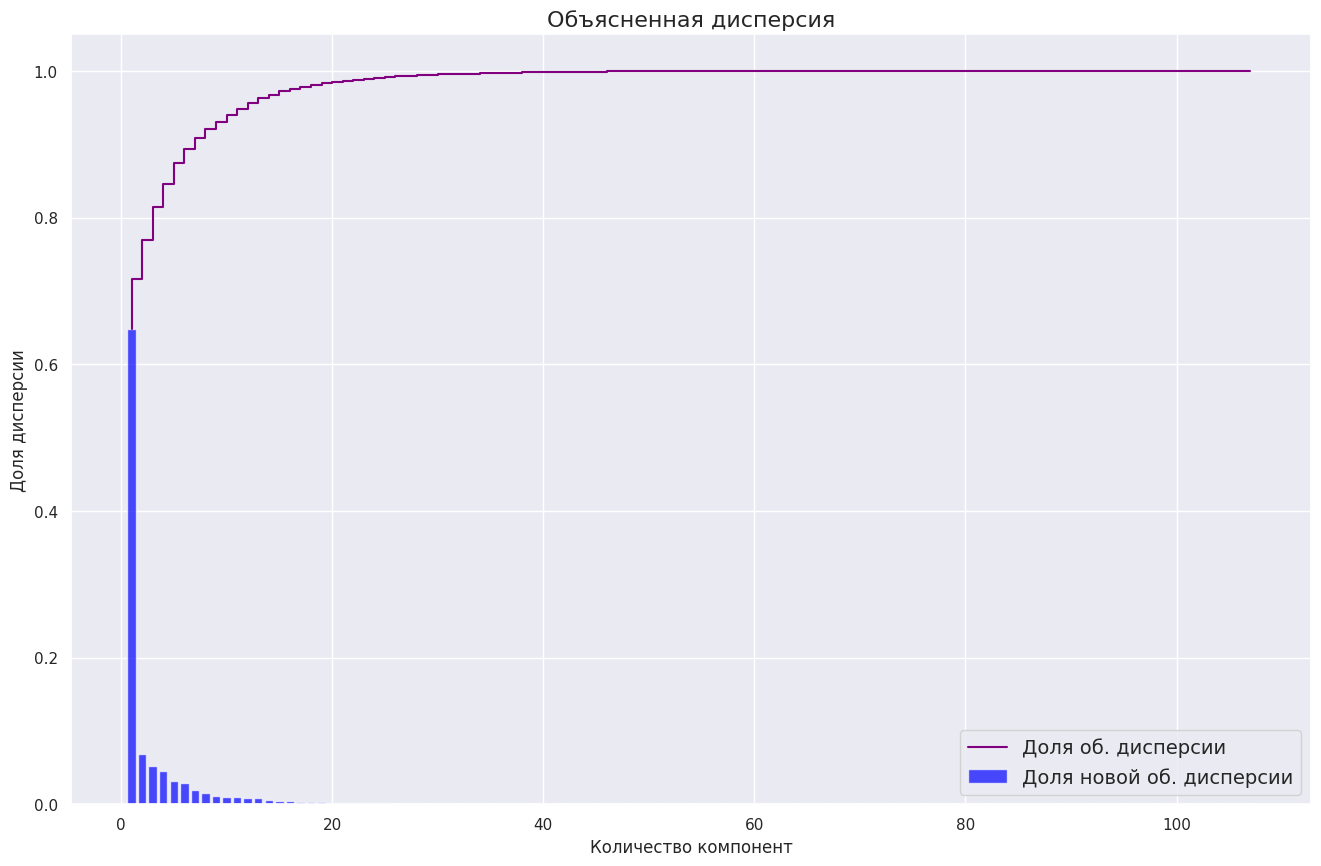

In [17]:
with sns.axes_style('darkgrid'):
  plt.figure(figsize=(16, 10))
  plt.title("Объясненная дисперсия", fontsize=16)
  plt.bar(np.arange(1, X.shape[1] + 1), pca.explained_variance_ratio_, alpha=0.7, color='blue', align="center", label="Доля новой об. дисперсии")
  plt.step(np.arange(1, X.shape[1] + 1), explained_var_cumsum, c='purple', label="Доля об. дисперсии", lw=1.5)
  plt.legend(loc='best', fontsize=14)
  plt.xlabel("Количество компонент")
  plt.ylabel("Доля дисперсии")

Посмотрим на график cv_score в зависимости от числа компонент. 

In [19]:
def find_best_params(model, params_grid, X_train, y_train):
    searcher = GridSearchCV(model,params_grid,scoring='neg_mean_squared_error')
    searcher.fit(X_train, y_train)
    print("Best parameters:", searcher.best_params_)
    model = searcher.best_estimator_
    return model


def MyTrainTest(model, parameters, title, X, y, need_grid = False):
    best_model = model
    if need_grid:
        best_model = find_best_params(model,parameters, X, y)
    else:
        best_model.fit(X, y)
    
    cv_score = cross_val_score(best_model, X, y, scoring='neg_mean_squared_error', cv=4).mean()
    print(f'cv score  -- ', cv_score)
    return cv_score, best_model

In [ ]:
cv_score_v9 = []
cv_score_v10 = []
models_v9 = []
models_v10 = []

for n in range(1, X.shape[1] + 1):
    model_v9 = Pipeline([
        ("Scale", StandardScaler()),
        ("PCA", PCA(n_components=n)),
        ("Scale after PCA", StandardScaler()),
        ("Model", LinearRegression(fit_intercept=True)),
    ])
    cv_lin_v9, _ = MyTrainTest(model_v9, None, "Linear", X, y_v9, False)
    cv_score_v9.append(cv_lin_v9)
    models_v9.append(model_v9)



    model_v10 = Pipeline([
        ("Scale", StandardScaler()),
        ("PCA", PCA(n_components=n)),
        ("Scale after PCA", StandardScaler()),
        ("Model", LinearRegression(fit_intercept=True)),
    ])
  
    cv_lin_v10, _ = MyTrainTest(model_v10, None, "Linear", X, y_v10, False)
    cv_score_v10.append(cv_lin_v10)
    models_v10.append(model_v10)

Значения ту би хонест меня пугают - отрисуем графики для обоих таргетов

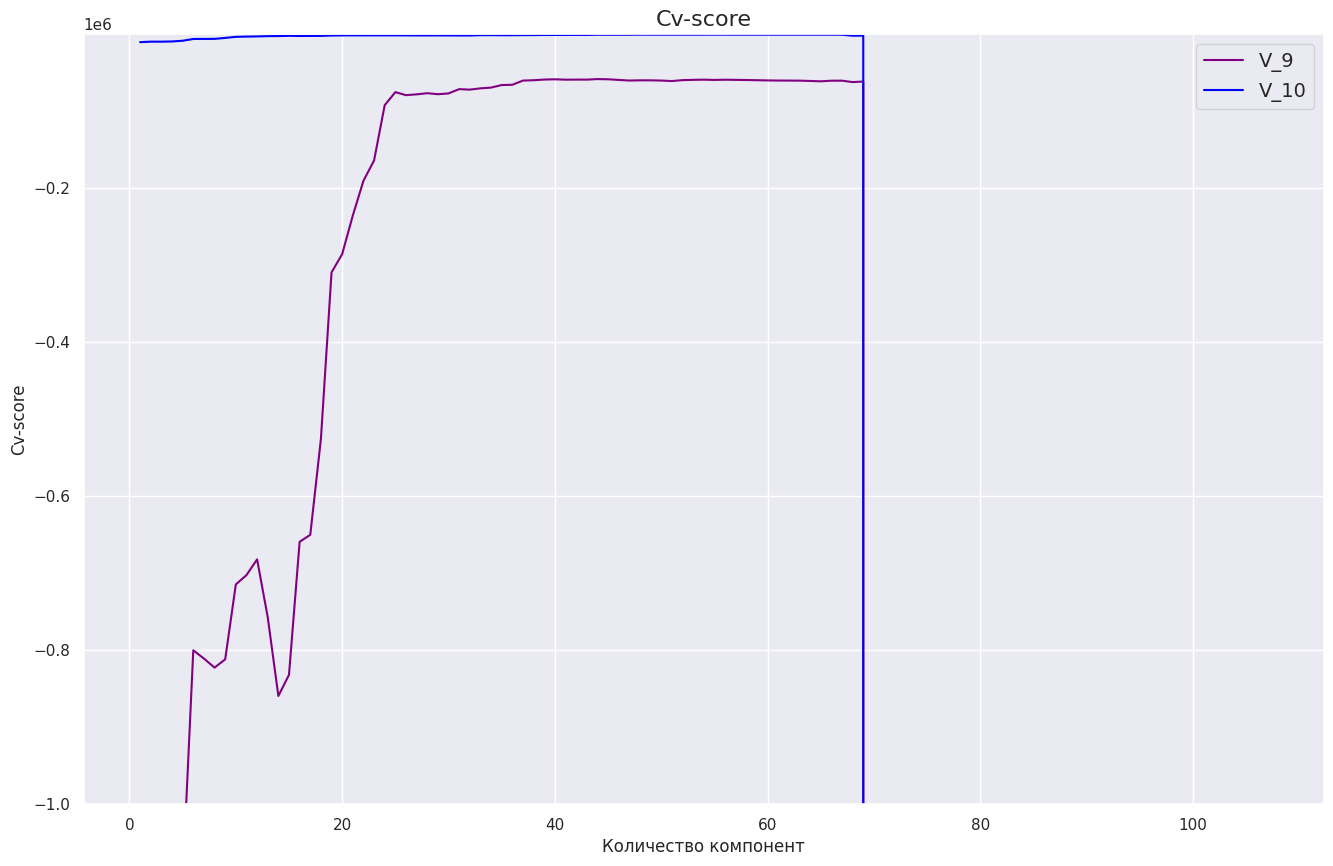

In [25]:
with sns.axes_style('darkgrid'):
  plt.figure(figsize=(16, 10))
  plt.title("Cv-score", fontsize=16)
  plt.plot(np.arange(1, X.shape[1] + 1), cv_score_v9, lw=1.5, c='purple', label='V_9')
  plt.plot(np.arange(1, X.shape[1] + 1), cv_score_v10, lw=1.5, c='blue', label='V_10')
  plt.legend(loc='best', fontsize=14)
  plt.xlabel("Количество компонент")
  plt.ylim(-1e6, -1e3)
  plt.ylabel("Cv-score")

Не оч информативно так как разные(я забыла слово) степени десятки у значений - поэтому по отедльност нрарисуем

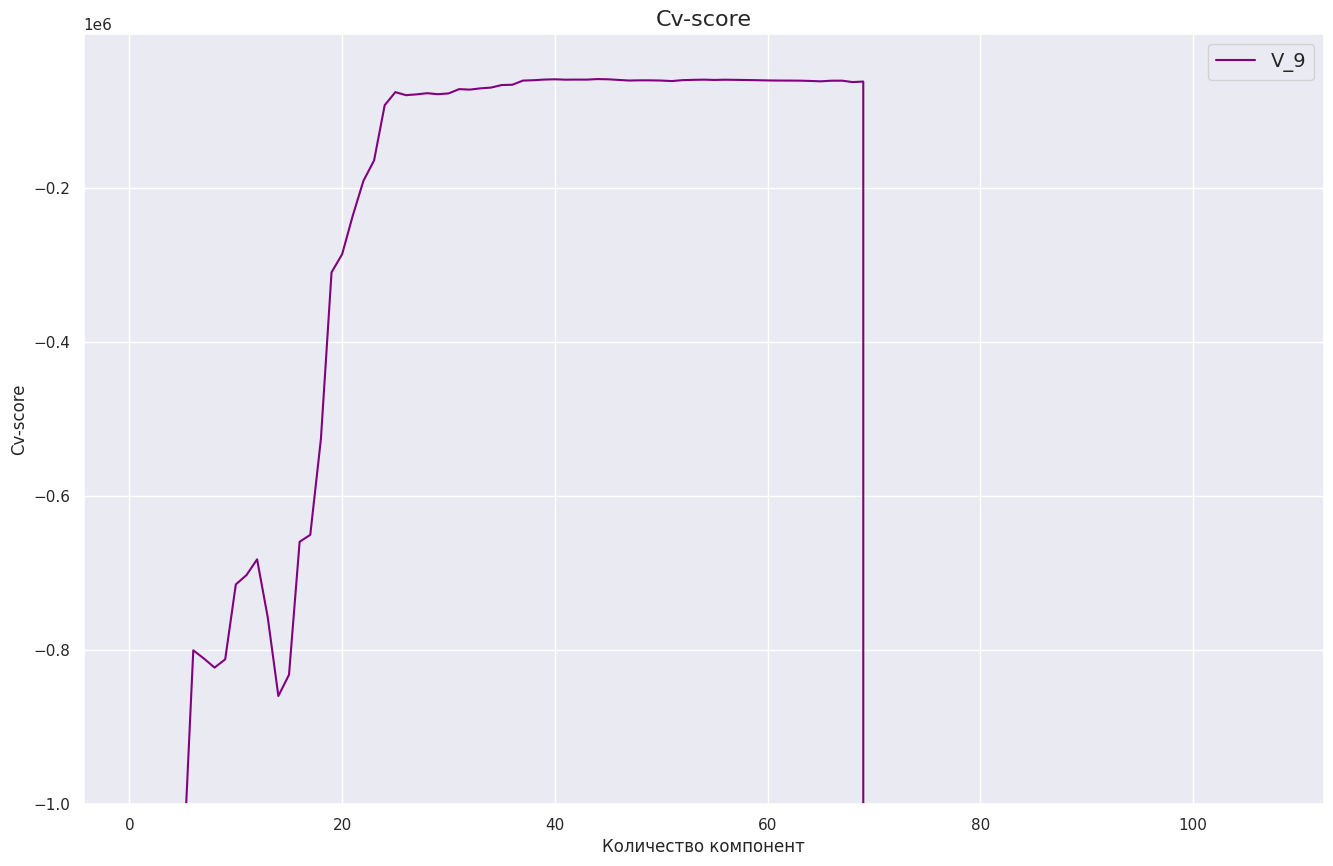

In [27]:
with sns.axes_style('darkgrid'):
  plt.figure(figsize=(16, 10))
  plt.title("Cv-score", fontsize=16)
  plt.plot(np.arange(1, X.shape[1] + 1), cv_score_v9, lw=1.5, c='purple', label='V_9')
  #plt.plot(np.arange(1, X.shape[1] + 1), cv_score_v10, lw=1.5, c='blue', label='V_10')
  plt.legend(loc='best', fontsize=14)
  plt.xlabel("Количество компонент")
  plt.ylim(-1e6, -1e3)
  plt.ylabel("Cv-score")

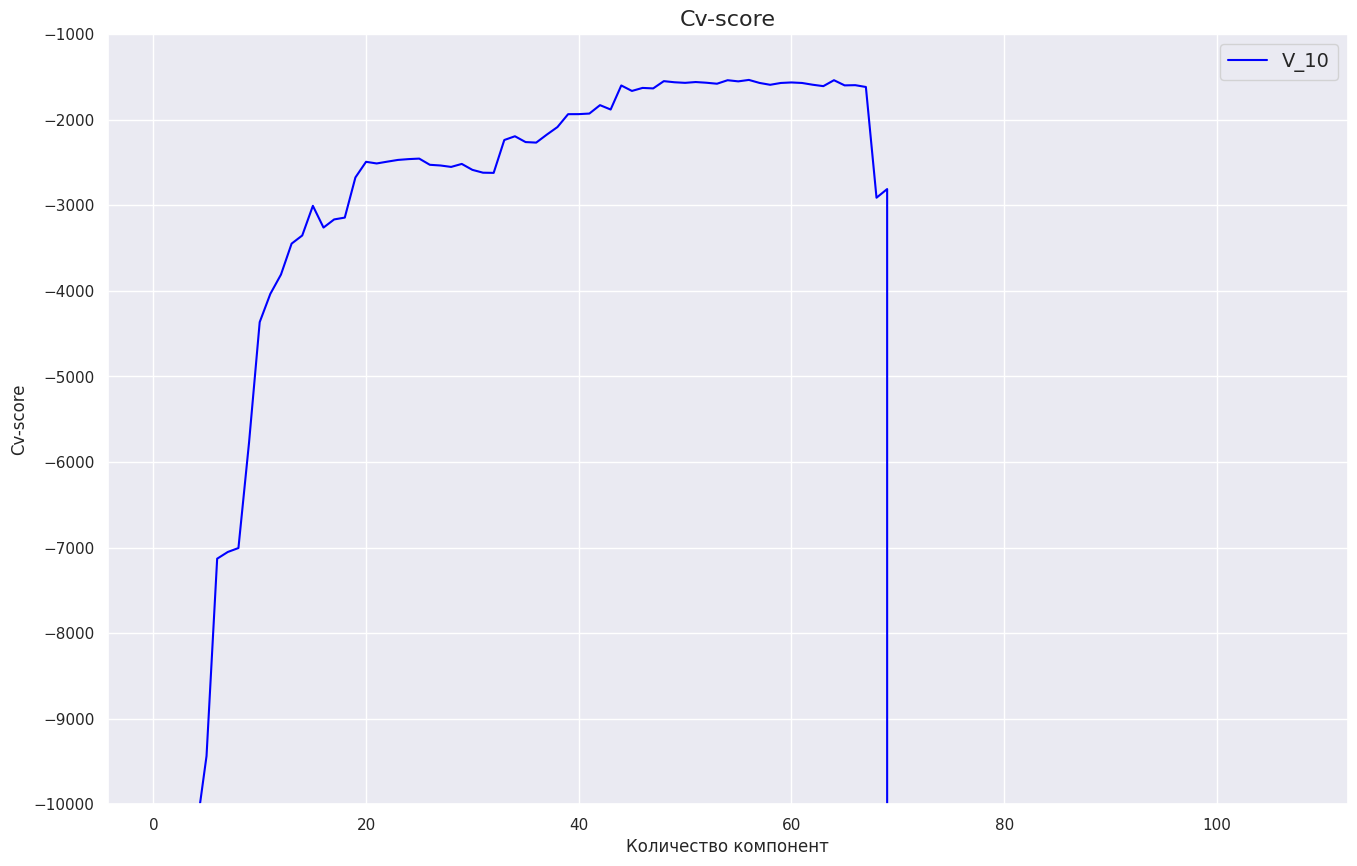

In [29]:
with sns.axes_style('darkgrid'):
  plt.figure(figsize=(16, 10))
  plt.title("Cv-score", fontsize=16)
  #plt.plot(np.arange(1, X.shape[1] + 1), cv_score_v9, lw=1.5, c='purple', label='V_9')
  plt.plot(np.arange(1, X.shape[1] + 1), cv_score_v10, lw=1.5, c='blue', label='V_10')
  plt.legend(loc='best', fontsize=14)
  plt.xlabel("Количество компонент")
  plt.ylim(-1e4, -1e3)
  plt.ylabel("Cv-score")

Графики получились похожие

In [31]:
num_comps_v9 = np.argmax(np.array(cv_score_v9))
num_comps_v10 = np.argmax(np.array(cv_score_v10))

print(f"Лучшее число компонент V9 -- {num_comps_v9 + 1}")
print(f"Лучшее число компонент V10 -- {num_comps_v10 + 1}")

print(f"Лучший score для v9-- {cv_score_v9[num_comps_v9]}")
print(f"Лучший score для v10-- {cv_score_v10[num_comps_v10]}")

print(models_v9[num_comps_v9].score(X, y_v9))
print(models_v10[num_comps_v10].score(X, y_v10))

Лучшее число компонент V9 -- 44
Лучшее число компонент V10 -- 56
Лучший score для v9-- -59155.475249575364
Лучший score для v10-- -1533.7704196336335
0.9881907290478096
0.9785002021637161


Получили достаточно интересный результат. Если сравнить этот график с графиком объясненной дисперсии, то видно, что лучший результат как раз достигается при числе компонент, когда объясненная дисперсия совсем перестает расти. Затем идет резкий спад, который, скорее всего, объясняется мультиколлинеарностью признаков. При этом, мы посчитали $R^2$, который близок к 0.98, а значит нет смысла отказываться от линейной модели.  попробуем провести регуляризацию. 



In [32]:
parameters = {'Model__alpha': np.append(np.arange(1, 10, 0.15), np.logspace(-6, -3, 4))}

# для V_9
model = Pipeline([
        ("Scale", StandardScaler()),
        ("PCA", PCA(n_components=num_comps_v9)),
        ("Scale after PCA", StandardScaler()),
        ("Model", Lasso(fit_intercept=True)),
    ])
cv_l, best_l_v9 = MyTrainTest(model, parameters, "Linear", X, y_v9, True)

Best parameters: {'Model__alpha': 6.399999999999997}
cv score  --  -52907.52552636416


In [33]:
parameters = {'Model__alpha': np.append(np.arange(1, 10, 0.15), np.logspace(-6, -3, 4))}

# для V_10
model = Pipeline([
        ("Scale", StandardScaler()),
        ("PCA", PCA(n_components=num_comps_v10)),
        ("Scale after PCA", StandardScaler()),
        ("Model", Lasso(fit_intercept=True)),
    ])
cv_l, best_l_v10 = MyTrainTest(model, parameters, "Linear", X, y_v10, True)

Best parameters: {'Model__alpha': 1e-06}
cv score  --  -1550.7418582139726


In [34]:
parameters = {'Model__alpha': np.append(np.arange(0.2, 20.1, 0.2), np.logspace(-6, -3, 4))}

# для V_9
model = Pipeline([
        ("Scale", StandardScaler()),
        ("PCA", PCA(n_components=num_comps_v9)),
        ("Scale after PCA", StandardScaler()),
        ("Model", Ridge(fit_intercept=True)),
    ])
cv_l, best_l_v9 = MyTrainTest(model, parameters, "Linear", X, y_v9, True)

Best parameters: {'Model__alpha': 6.800000000000001}
cv score  --  -52484.97347441499


In [35]:
parameters = {'Model__alpha': np.append(np.arange(0.2, 20.1, 0.2), np.logspace(-6, -3, 4))}

# для V_10
model = Pipeline([
        ("Scale", StandardScaler()),
        ("PCA", PCA(n_components=num_comps_v10)),
        ("Scale after PCA", StandardScaler()),
        ("Model", Ridge(fit_intercept=True)),
    ])
cv_l, best_l_v10 = MyTrainTest(model, parameters, "Linear", X, y_v10, True)

Best parameters: {'Model__alpha': 0.2}
cv score  --  -1551.7280293856736


Как видим, регуляризация помогает только для V_9,  но не то чтобы супер

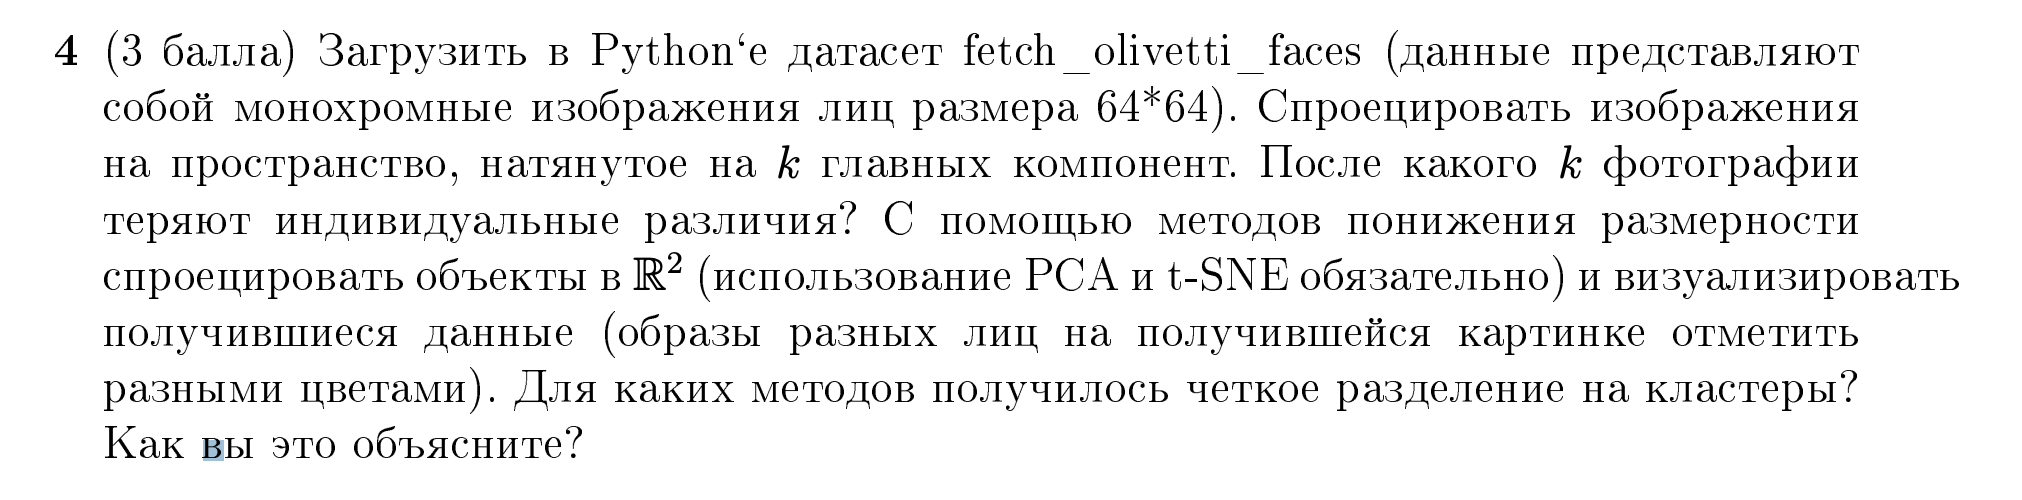

In [40]:
faces = datasets.fetch_olivetti_faces()
faces['DESCR']

'.. _olivetti_faces_dataset:\n\nThe Olivetti faces dataset\n--------------------------\n\n`This dataset contains a set of face images`_ taken between April 1992 and \nApril 1994 at AT&T Laboratories Cambridge. The\n:func:`sklearn.datasets.fetch_olivetti_faces` function is the data\nfetching / caching function that downloads the data\narchive from AT&T.\n\n.. _This dataset contains a set of face images: https://cam-orl.co.uk/facedatabase.html\n\nAs described on the original website:\n\n    There are ten different images of each of 40 distinct subjects. For some\n    subjects, the images were taken at different times, varying the lighting,\n    facial expressions (open / closed eyes, smiling / not smiling) and facial\n    details (glasses / no glasses). All the images were taken against a dark\n    homogeneous background with the subjects in an upright, frontal position \n    (with tolerance for some side movement).\n\n**Data Set Characteristics:**\n\n    =================   ============

 >There are ten different images of each of 40 distinct subjects.


In [41]:
X, y = faces.data, faces.target
X.shape, y.shape

((400, 4096), (400,))

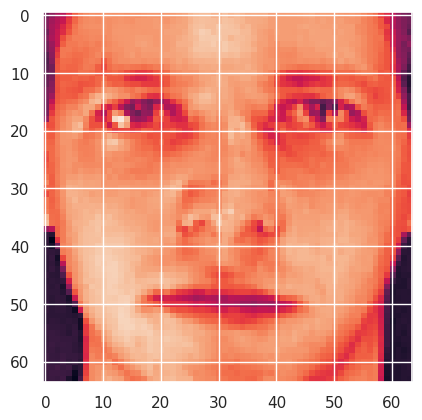

In [42]:
plt.imshow(X[0].reshape(64, 64))

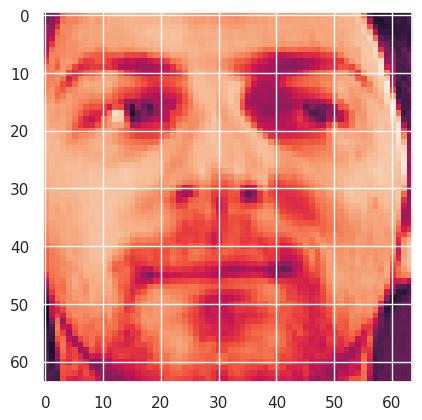

In [45]:
plt.imshow(X[66].reshape(64, 64))

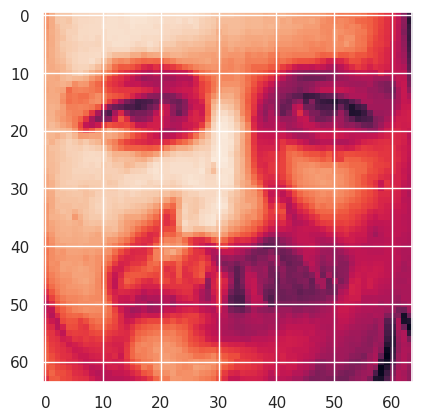

In [44]:
plt.imshow(X[245].reshape(64, 64)) # у меня др 24 мая

Используем PCA, чтобы понять, какое минимальльное число компонент можно иметь, чтобы индивидуальные различия не терялись. Для этого будем смотреть на 8 ближайших соседей каждой картинки и посмотрим, для какого числа картинок из 8 ближайших соседей 7 того же значения тартета. 

In [47]:
components = np.arange(1, 100)
neighbours = 6

good_marks = []

for n in components:
    pca = Pipeline([
        ("Scaler", StandardScaler()),
        ("Model", PCA(n_components=n)),
    ])
    X_new = pca.fit_transform(X)
    knn = KNeighborsClassifier(n_neighbors=neighbours)
    knn.fit(X_new, y)
    vals = knn.predict(X_new)
    good_marks.append(len(vals[vals == y]))

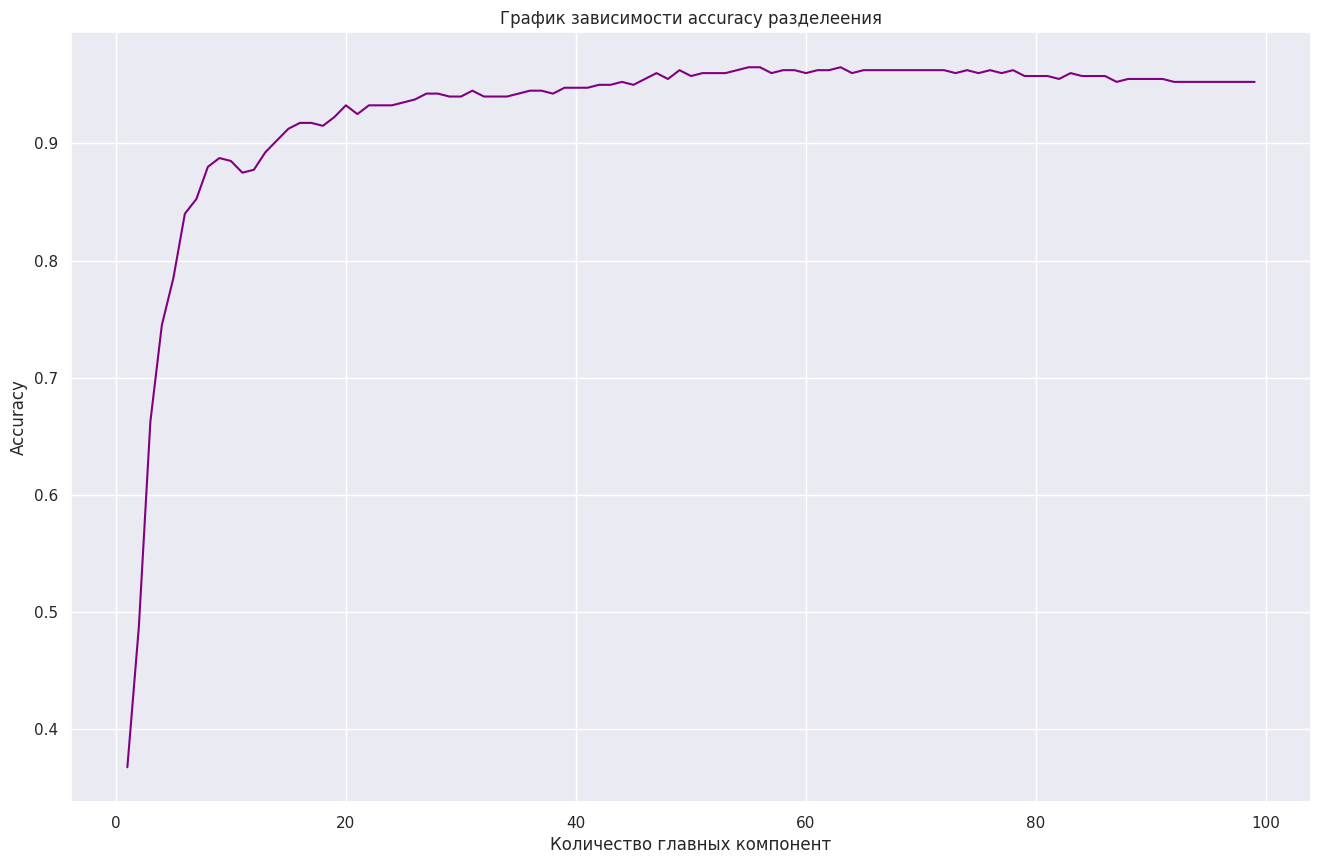

In [48]:
with sns.axes_style('darkgrid'):
  plt.figure(figsize=(16, 10))
  plt.title("График зависимости accuracy разделеения")
  plt.plot(components, np.array(good_marks) / X.shape[0], c='purple')
  plt.xlabel("Количество главных компонент")
  plt.ylabel("Accuracy")

Как видим, хороших прирост идет до ~35-40 компонент, затем идет плато. Теперь спроецируем все на $R^2$ и посмотрим, как что разделяется на кластера. Согласно графику, ожидается что PCA покажет плохой результат. При этом, TSNE является одним из лучших алгоритмов визуализации, поэтому есть надежда, что получится хороший результат.

<ipython-input-49-d3dd85a73218>:13: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  sc = plt.scatter(X_new[:, 0], X_new[:, 1], c=y, cmap=cm.get_cmap('viridis', 40))


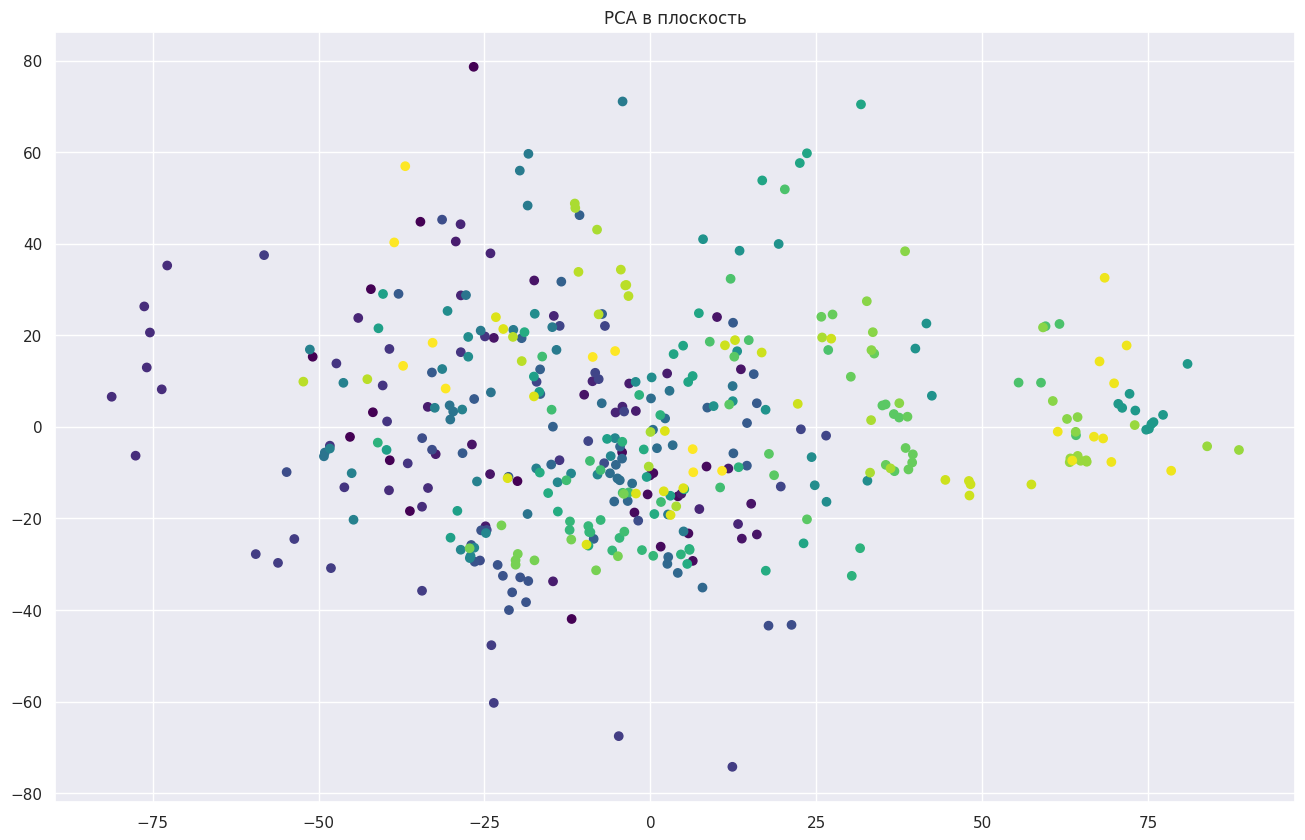

In [49]:
from matplotlib import cm

pca = Pipeline([
        ("Scaler", StandardScaler()),
        ("Model", PCA(n_components=2)),
    ])
X_new = pca.fit_transform(X)


with sns.axes_style('darkgrid'):
  plt.figure(figsize=(16, 10))
  plt.title("PCA в плоскость")
  sc = plt.scatter(X_new[:, 0], X_new[:, 1], c=y, cmap=cm.get_cmap('viridis', 40))

<ipython-input-53-3047a2fdd49f>:10: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  sc = plt.scatter(X_new[:, 0], X_new[:, 1], c=y, cmap=cm.get_cmap('viridis', 40))


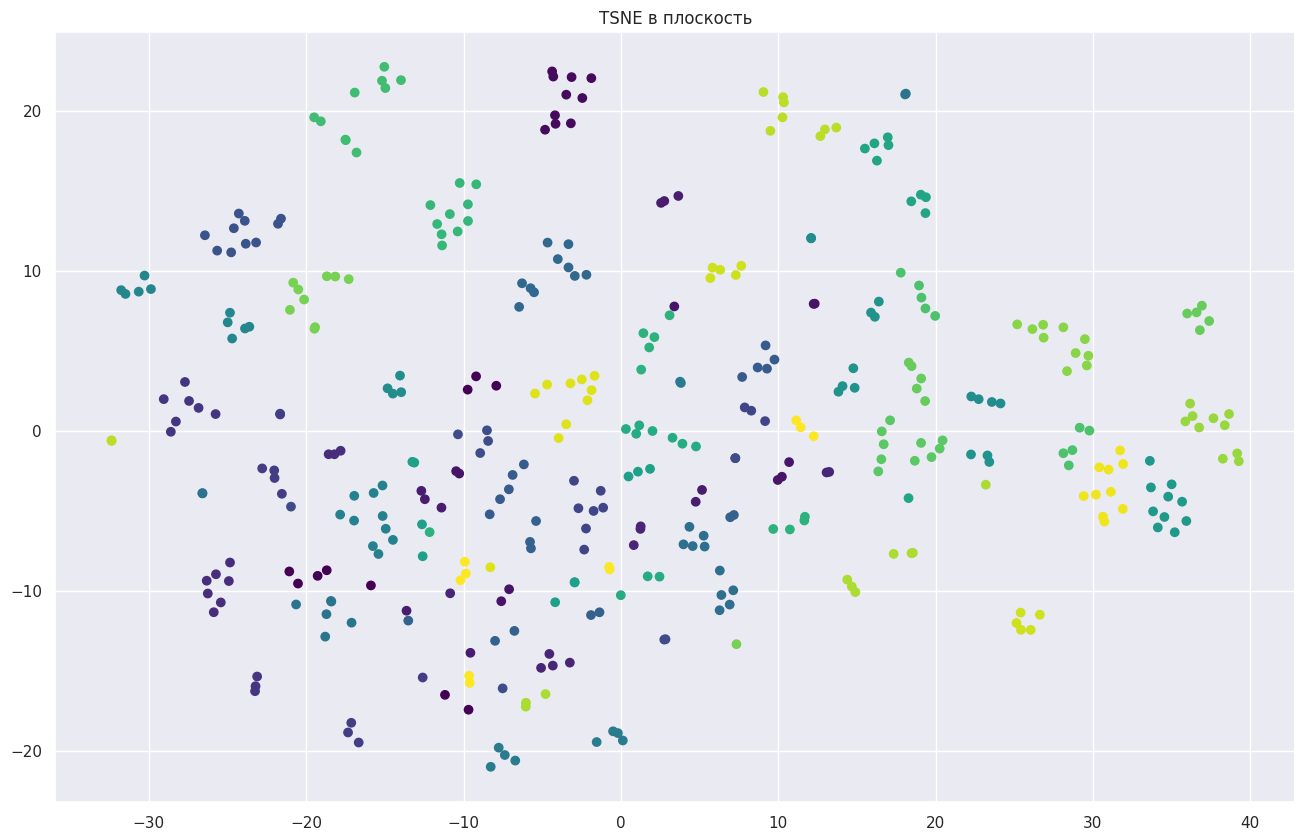

In [53]:
sne = Pipeline([
        ("Scaler", StandardScaler()),
        ("Model", TSNE(n_components=2)),
    ])
X_new = sne.fit_transform(X)

with sns.axes_style('darkgrid'):
  plt.figure(figsize=(16, 10))
  plt.title("TSNE в плоскость")
  sc = plt.scatter(X_new[:, 0], X_new[:, 1], c=y, cmap=cm.get_cmap('viridis', 40))

Как видим, ожидания подтвердились. 

Попробуем еще и Isomap.

<ipython-input-54-3941633ffa57>:7: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  sc = plt.scatter(X_new[:, 0], X_new[:, 1], c=y, cmap=cm.get_cmap('viridis', 40))


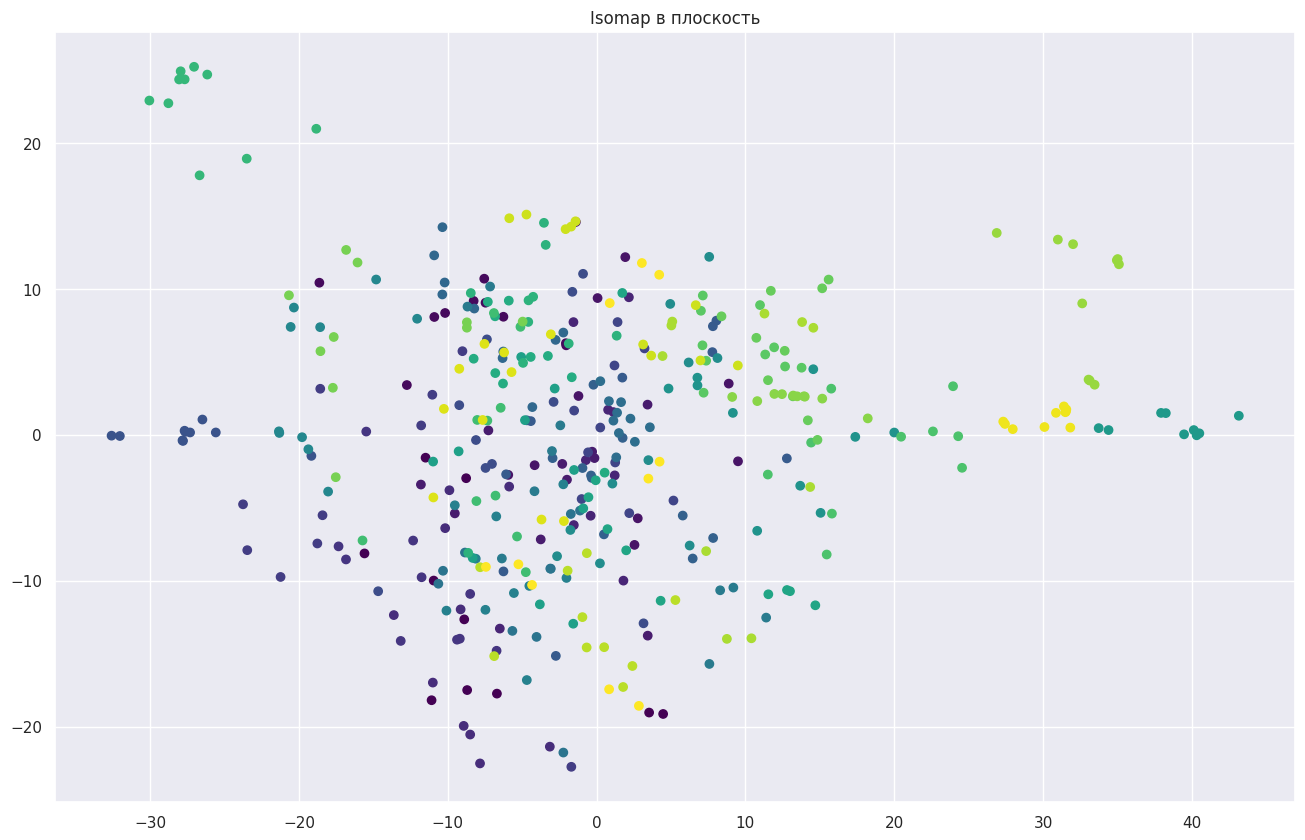

In [54]:
isomap = Isomap(n_neighbors=7, n_components=2)
X_new = isomap.fit_transform(X)

with sns.axes_style('darkgrid'):
  plt.figure(figsize=(16, 10))
  plt.title("Isomap в плоскость")
  sc = plt.scatter(X_new[:, 0], X_new[:, 1], c=y, cmap=cm.get_cmap('viridis', 40))

Как видим,  Isomap не справился.